# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.
primero se importan las librerias con las que se estará trabajando durante todo el proyecto, despues asignaré a 5 variables diferentes los archivos con sus respectivos separadores despues de analizar el tipo de estructura con la que vienen por default.
despues se mostrará la información de cada uno de ellos. 
Cabe mencionar que añadiré la función display para mostrar las primeras 5 lineas solo para tener una vision general de la estructura del dataframe. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_produc = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_dept = pd.read_csv('/datasets/departments.csv', sep=';')
df_orprod = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
df_orders.info()
display(df_orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
df_produc.info()
display(df_produc.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
df_aisles.info()
display(df_aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
df_dept.info()
display(df_dept.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
df_orprod.info(show_counts=True)
display(df_orprod.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Conclusiones

En el primer dataframe: df_orders, hay un total de 478967 datos por columna de las cuales todas estan completas a excepción de la comlumna "days_since_prior_order". en ésta hay un faltante de 28,819 datos lo que significa que son NaN. Al haber faltantes en la columna se puede concluir en la grafica que se debe a que los usuarios no han vuelto a realizar un pedido. los tipos de datos son enteros de las primeras 5 columnas y la de "days_since_prior_order" son flotantes.

El segundo dataframe contiene 4 columnas con 49694 entradas. Las columnas: product_id, aisle_id, department_id  estan completas y sus datos son del tipo int64. Una de las columnas: "product_name" no esta completa. Hay un faltante de 1258 nombres de productos lo cual es probable su omisión por error y deberá de ser verificada por la tienda ya que tienen todos los demás datos con los que se vincula el producto ausente, completos (su id, departamento y pasillo). Su tipo de dato es "string".

El tercer dataframe nos muestra 134 entradas, en éste caso, pasillos cuyos datos están completos. 

El cuarto dataframe indica la existencia de 21 departamentos cuyos datos también están completos.

El quinto dataframe contiene 4545007 entradas y 4 columnas y en una hay datos faltantes: "add_to_cart_order", solo tiene 4544171 
entradas registradas.



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

 - En base a la información obtenida anteriormente con info() se verifica que todas las columnas cuyos prefijos llevan id son del tipo entero (int64)
 - Para los valores ausentes se sabe que aquellas columnas faltantes son categoricas, aplicará la función isna.sum() y para rellenarlos fillna() asignando NaN como valor de string. 
 - En cuanto a duplicados, se manejará el dataframe con las funciones duplicated(), sum() y drop_duplicates para filtrar, contar y eliminar duplicados respectivamente. 
 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
print(df_orders[df_orders.duplicated()])
print()
print(df_orders.duplicated().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
R= Si, hay 15 lineas duplicadas y tienen en común que son pedidos realizados el miércoles a las 2 de la tarde.

In [9]:
filterer_orders = df_orders.query("order_dow == 3 & order_hour_of_day == 2")
print(filterer_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?
que al ser todos del mismo dia a la misma hora, fue muy probable un error en el sistema.

In [10]:
# Elimina los pedidos duplicados
df_orders = df_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_orders[df_orders.duplicated()])
print()
print(df_orders.duplicated().sum())

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_orders[df_orders['order_id'].duplicated()])
print()
print(df_orders['order_id'].duplicated().sum())

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Al utilizar un filtro con valores duplicados (funcion: dupicated() y sum()) se detectaron 15 lineas duplicadas del miércoles a las dos de la tarde lo cual indica error en el sistema así que se eliminaron utilizando la función drop_duplicates().

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(df_produc[df_produc.duplicated()])
print()
print(df_produc.duplicated().sum())

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []

0


In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
print(df_produc[df_produc['product_id'].duplicated()])
print()
print(df_produc['product_id'].duplicated().sum())

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []

0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_produc['product_name'] = df_produc['product_name'].str.upper()
print(df_produc[df_produc['product_name'].duplicated()])
print()
print("El total de productos duplicados es:",
      df_produc['product_name'].duplicated().sum())

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
Duplicated_products = df_produc['product_name'][df_produc['product_name'].duplicated(
) & ~df_produc['product_name'].isnull()]

print(Duplicated_products)
print()
print("El total de productos duplicados sin contar ausentes es:",
      Duplicated_products.count())

2058                                     BIOTIN 1000 MCG
5455                    GREEN TEA WITH GINSENG AND HONEY
5558                              CREAM OF MUSHROOM SOUP
7558                           CINNAMON ROLLS WITH ICING
9037                              AMERICAN CHEESE SLICES
                              ...                       
49689                      HIGH PERFORMANCE ENERGY DRINK
49690                      ORIGINAL PANCAKE & WAFFLE MIX
49691    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                             SPRING WATER BODY WASH
49693                            BURRITO- STEAK & CHEESE
Name: product_name, Length: 104, dtype: object

El total de productos duplicados sin contar ausentes es: 104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al aplicar el método duplicated en el dataframe general, no encuentra duplicados, sin embargo al pasarlo columna por columna nos damos cuenta de que al llegar a "product_name" hay nombres duplicados de productos y sin contar ausentes hay 104 repetidos.
Para poder tomarlos en cuenta se necesita saber si en realidad son duplicados ya que tienen diferentes id o solamente se necesita una información mas detallada del producto. 

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(df_dept[df_dept.duplicated()])
print()
print(df_dept.duplicated().sum())

Empty DataFrame
Columns: [department_id, department]
Index: []

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_dept['department'][df_dept['department'].duplicated()])
print()
print(df_dept['department'].duplicated().sum())

Series([], Name: department, dtype: object)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No existen duplicados en el dataframe de departamentos. 

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles[df_aisles.duplicated()])
print()
print(df_aisles.duplicated().sum())

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []

0


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_aisles['aisle_id'][df_aisles['aisle_id'].duplicated()])
print()
print(df_aisles['aisle_id'].duplicated().sum())

Series([], Name: aisle_id, dtype: int64)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No existen duplicados en el dataframe de aisles

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(df_orprod[df_orprod.duplicated()])
print()
print(df_orprod.duplicated().sum())

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products_dp = df_orprod['order_id'][df_orprod['order_id'].duplicated() & df_orprod['product_id'].duplicated(
) & df_orprod['reordered'].duplicated() & df_orprod['add_to_cart_order'].isnull()]
print(order_products_dp.count())

817


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Al pasar la función de duplicados por el dataframe completo de order_products no se detectan duplicados, sin embargo, al revisar la tabla se tienen ausentes datos en la columna de "add_to_cart_order" asi que al aplicar la formula para detectar duplicados en las otras tres columnas restantes y ausentes en "add_to_cart_order" se cuentan 817 renglones, por lo que cabe la posibilidad de que sean duplicados. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_produc[df_produc['product_name'].isna()])
print()
print("El total de valores ausentes es de:",
      df_produc['product_name'].isna().sum())

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]

El total de valores ausentes es de: 1258


Describe brevemente cuáles son tus hallazgos.
El total de valores ausentes es de 1258 y por lo que se ve en la gráfica, pertenecen al pasillo 100 departamento id: 21

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_produc[(df_produc['product_name'].isna())
      & (df_produc['aisle_id'] == 100)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Al aplicar el filtro, nos muestra que hay 1258 entradas ausentes relacionadas con el pasillo 100 por lo que coincide con el total de entradas ausentes.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_produc[(df_produc['product_name'].isna())
      & (df_produc['department_id'] == 21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Hay un total de 1258 entradas ausentes relacionadas con el departamento 21 por lo que coincide en su totalidad con los ausentes.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_dept[df_dept['department_id'] == 21])
print()
print(df_aisles[df_aisles['aisle_id'] == 100])

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.

En ambas tablas se encuentran sus respectivos valores ausentes.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_produc['product_name'] = df_produc['product_name'].fillna('Unknown')
print(df_produc[df_produc['product_name'].isna()].count())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se rellenaron los NaN en la columna 'product_name' por el string: 'Unknown' y ahora aparecen 0 valores ausentes en todas las categorías.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(df_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(df_orders[(df_orders['days_since_prior_order'].isna())
      & (df_orders['order_number'] == 1)])
print()
print(df_orders[(df_orders['days_since_prior_order'].isna())
      & (df_orders['order_number'] != 1)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

Describe brevemente tus hallazgos y lo que hiciste con ellos.
De los dos dataframes filtrados se puede concluir que todos aquellos valores ausentes son porque fueron el primer pedido del cliente por lo que no hay dias transcurridos desde el último pedido.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(df_orprod.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_orprod['add_to_cart_order'].min(),
      df_orprod['add_to_cart_order'].max())

1.0 64.0


Describe brevemente cuáles son tus hallazgos.
el mínimo es 1 y el máximo 64 lo que significa que un producto va desde ser el primero en agregarse al carrito hasta ser el no. 64 en ser agregado. 

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
nan_cart_ordersdf = df_orprod[df_orprod['add_to_cart_order'].isna(
)]['order_id']
print(nan_cart_ordersdf)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [60]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

# Filtro de datos
products_ct = df_orprod[df_orprod['order_id'].isin(nan_cart_ordersdf)]

# conteo de productos por pedido.
products_filtered = products_ct.groupby(
    'order_id')['product_id'].count().sort_values(ascending=False).reset_index()
print('El minimo de productos adquirido es de:',
      products_filtered['product_id'].min())
print('los pedidos con mas de 64 productos son:',
      products_filtered['product_id'].count())

El minimo de productos adquirido es de: 65
los pedidos con mas de 64 productos son: 70


Describe brevemente cuáles son tus hallazgos.
hay 70 productos con mas de 64 productos y el pedido con menos productos fue de 65 productos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_orprod['add_to_cart_order'] = df_orprod['add_to_cart_order'].fillna(999)
df_orprod['add_to_cart_order'] = df_orprod['add_to_cart_order'].astype('int')
df_orprod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Tras la aplicación de la función fillna() ahora hay 0 datos NaN y se conviertieron en enteros (int)

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Primeramente en la detección de no. duplicados se descubrió que algunos datos registrados el miércoles a las 2 de la mañana se duplicaron por un posible error en el sistema. 
No siempre al pasar la función duplicated() por todo el dataframe significa que detectará por seguro duplicados, sino, que es conveniente pasarla por columnas cuyos datos sean únicos para poder ubicar problemas de datos que no sean tan obvios. 
En cuanto a los datos ausentes, por medio de la falta de entradas en algunos dataframes se puede llegar a la detección de patron de entradas ya que el departamento 21, por el pasillo 100. No tenía datos de productos.
En cuanto al dataframe de productos ordenados, la falta de datos era ni mas ni menos que por una descripción ovia de dias transcurridos desde la ultima compra, ya que si eran clientes nuevos, obviamente no se tendrían datos en ésta columna. 


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(sorted(df_orders['order_hour_of_day'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [36]:
print(sorted(df_orders['order_dow'].unique()))

[0, 1, 2, 3, 4, 5, 6]


Escribe aquí tus conclusiones

Ambas columnas se encuentran dentro de valores razonables

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<function matplotlib.pyplot.show(close=None, block=None)>

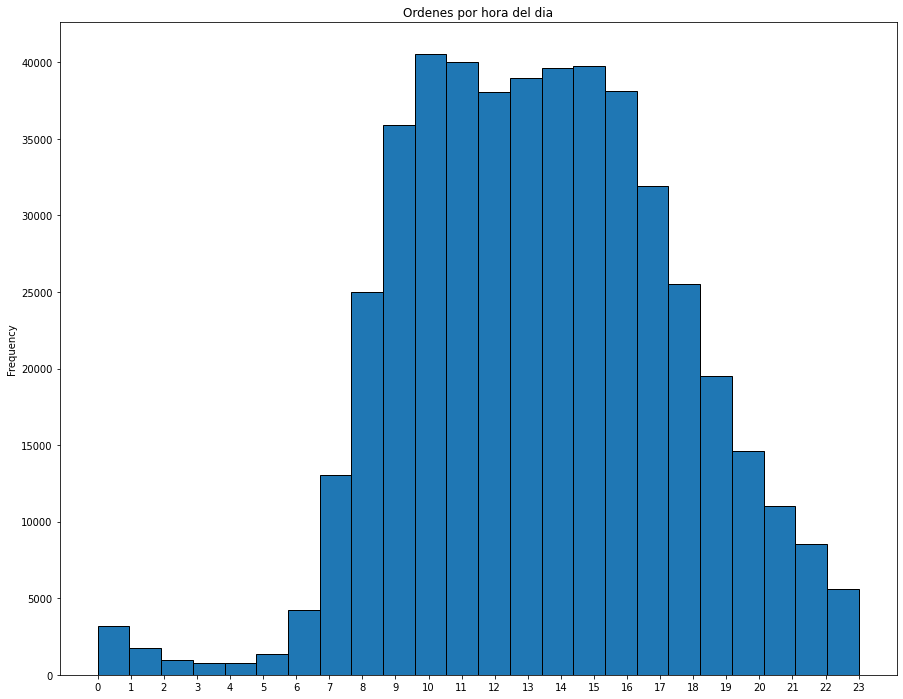

In [37]:
df_orders['order_hour_of_day'].plot(
    kind='hist', ec='k', bins=24, title='Ordenes por hora del dia', ylabel='Frecuencia de ordenes', figsize=(15, 12))
plt.xticks(range(24))
plt.show

Escribe aquí tus conclusiones
De acuerdo al histograma, ha hora del día que hay mas compras es a las 10 de la mañana y las horas mas lentas son entre 3 y 4 de la mañana. 

### [A3] ¿Qué día de la semana compran víveres las personas?

<function matplotlib.pyplot.show(close=None, block=None)>

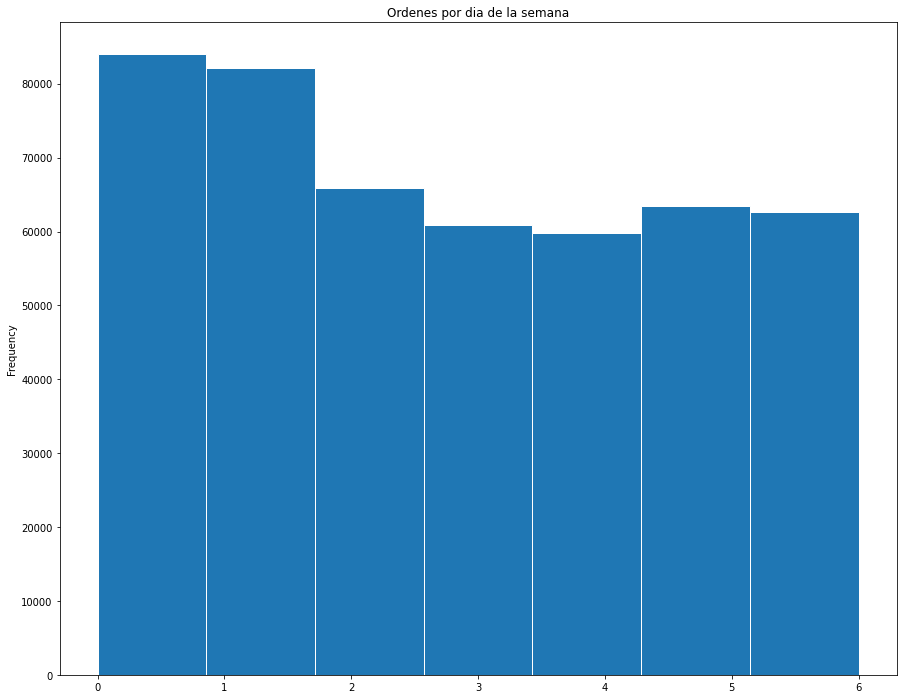

In [38]:
df_orders['order_dow'].plot(kind='hist', ec='white', bins=7,
                            title='Ordenes por dia de la semana', ylabel='Frecuencia de ordenes', figsize=(15, 12))
plt.xticks(range(7))
plt.show

Escribe aquí tus conclusiones

El dia que se realizan mas dias son los domingos y el que menos son los jueves

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<function matplotlib.pyplot.show(close=None, block=None)>

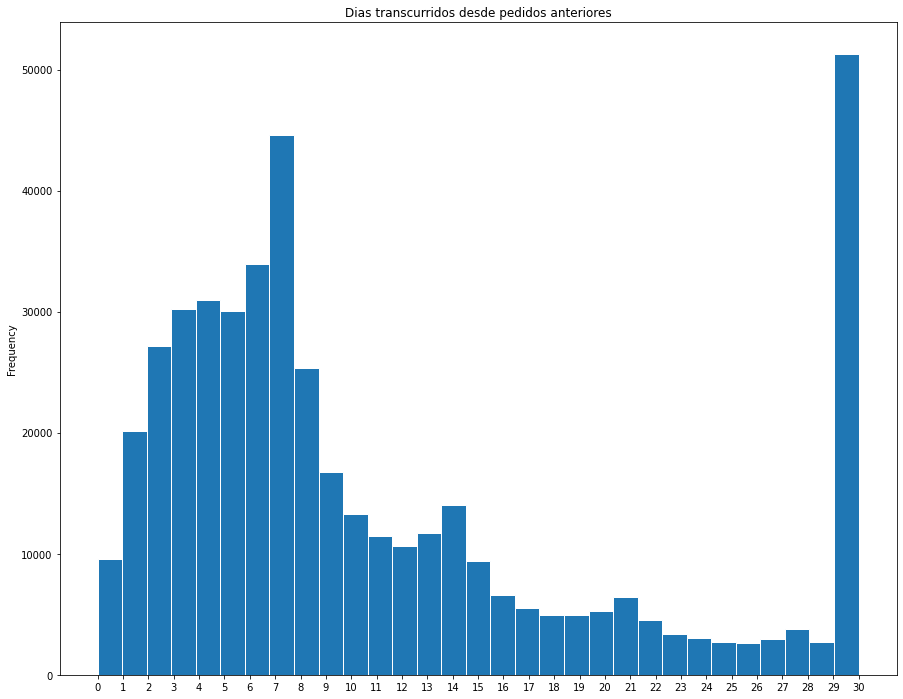

In [39]:
df_orders['days_since_prior_order'].plot(
    kind='hist', ec='white', bins=31, title='Dias transcurridos desde pedidos anteriores', ylabel='Frecuencia de pedidos', figsize=(15, 12))
plt.xticks(range(31))
plt.show

Escribe aquí tus conclusiones

los dias que la mayoría de gente espera para realizar un pedido son 30 y los que menos son 26

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

<function matplotlib.pyplot.show(close=None, block=None)>

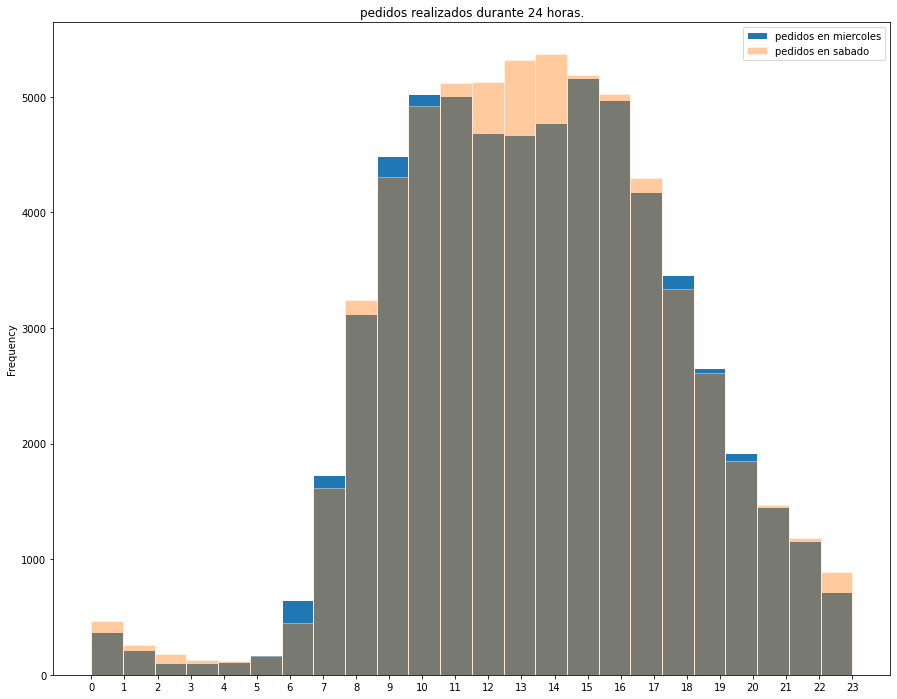

In [40]:
df_orders_filtered = df_orders[df_orders['order_dow'] == 3]['order_hour_of_day'].plot(
    kind='hist', ec='white', bins=24, figsize=(15, 12), title='pedidos realizados durante 24 horas.')
df_orders_filtered = df_orders[df_orders['order_dow'] == 6]['order_hour_of_day'].plot(
    kind='hist', ec='white', bins=24, alpha=0.4)
plt.xticks(range(24))
plt.legend(['pedidos en miercoles', 'pedidos en sabado'])
plt.show

Escribe aquí tus conclusiones

La distribución de la gráfica es muy similar para ambos días. Tienen un comportamiento muy parecido. la diferencia es que el pico mas alto de ventas el sábado es a las 14:00 hrs y el miércoles a las 15:00 hrs.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<function matplotlib.pyplot.show(close=None, block=None)>

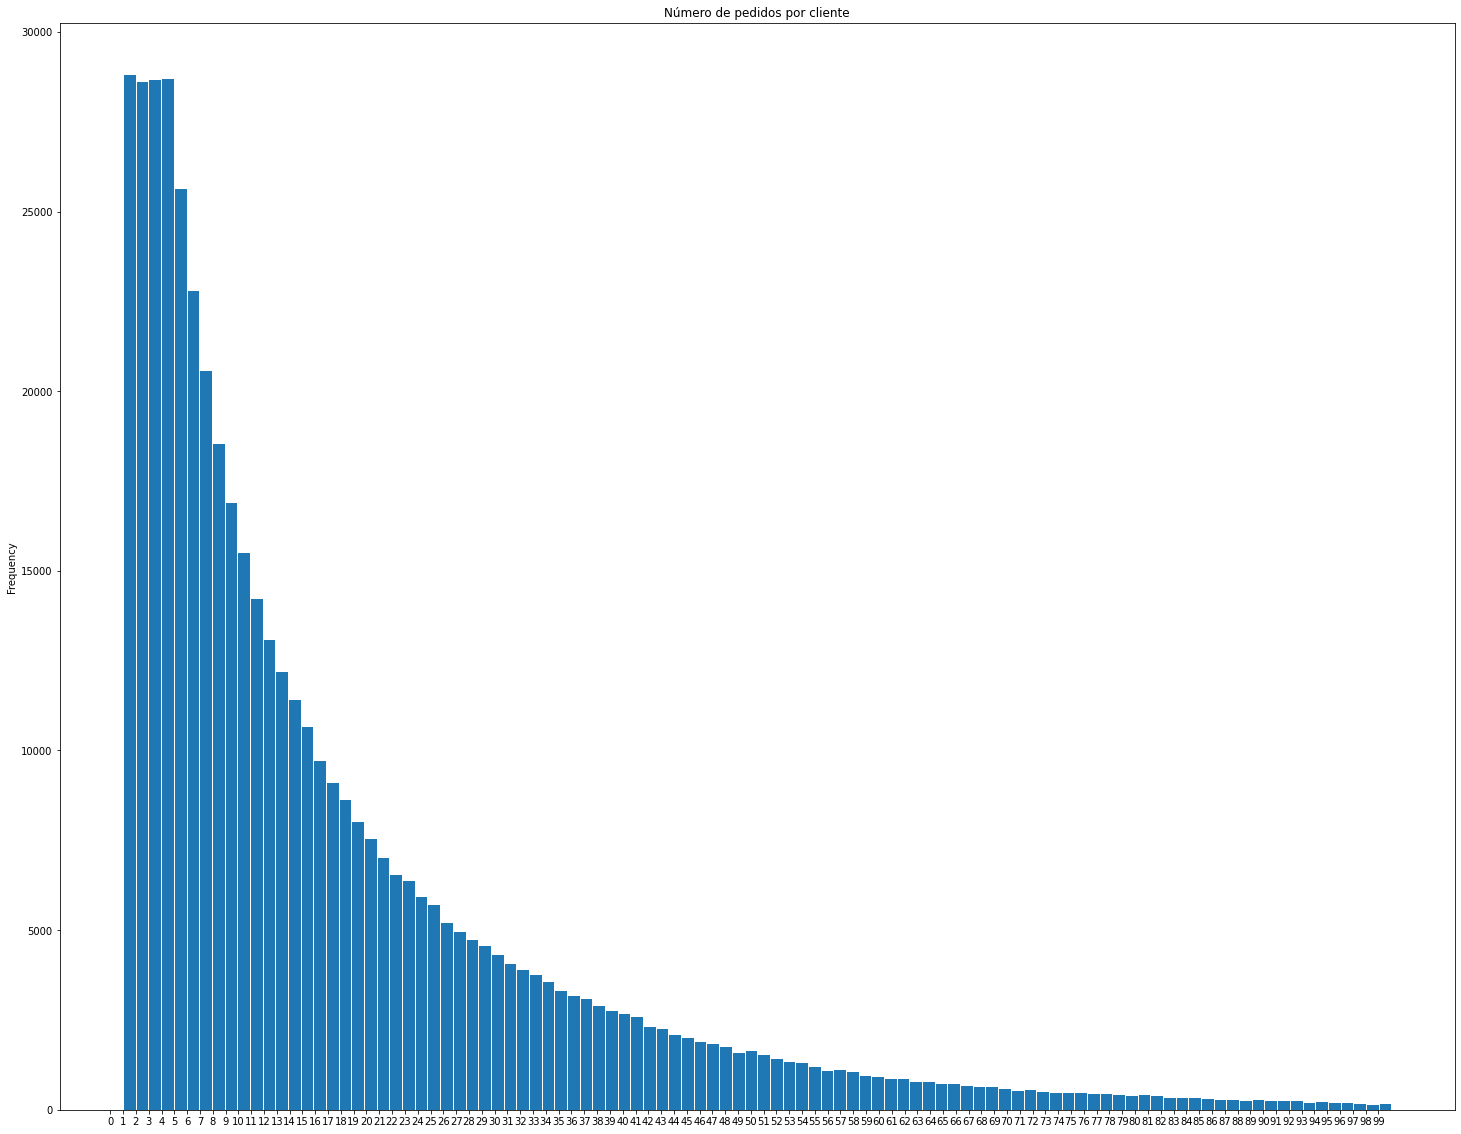

In [41]:
df_orders['order_number'].plot(kind='hist', ec='white', bins=100,
                               title='Número de pedidos por cliente', ylabel='Frecuencia de pedidos', figsize=(25, 20))
plt.xticks(range(100))
plt.show

Escribe aquí tus conclusiones
La mayor parte de ventas han sido de clientes con un solo pedido y la grafica va disminuyendo, menos clientes tienen mas pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [42]:
# combinación de las dos graficas que contienen product_id para arrojar el nombre con su id.
merged_product_id = df_orprod.merge(df_produc, on='product_id', how='left')

print(merged_product_id.head())

   order_id  product_id  add_to_cart_order  reordered  \
0   2141543       11440                 17          0   
1    567889        1560                  1          1   
2   2261212       26683                  1          1   
3    491251        8670                 35          1   
4   2571142        1940                  5          1   

                                        product_name  aisle_id  department_id  
0                     CHICKEN BREAST TENDERS BREADED       129              1  
1                                         BAG OF ICE        37              1  
2  CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...        91             16  
3                                     DICED TOMATOES        81             15  
4                        ORGANIC 2% REDUCED FAT MILK        84             16  


In [43]:
# A Continuacion se muestra en orden descendente el grado de popularidad del producto
df_orprod_pop = merged_product_id['product_name'].value_counts(
).sort_values(ascending=False).reset_index()
print(df_orprod_pop.head(20))

                       index  product_name
0                     BANANA         66050
1     BAG OF ORGANIC BANANAS         53297
2       ORGANIC STRAWBERRIES         37039
3       ORGANIC BABY SPINACH         33971
4       ORGANIC HASS AVOCADO         29773
5            ORGANIC AVOCADO         24689
6                LARGE LEMON         21495
7               STRAWBERRIES         20018
8                      LIMES         19690
9         ORGANIC WHOLE MILK         19600
10       ORGANIC RASPBERRIES         19197
11      ORGANIC YELLOW ONION         15898
12            ORGANIC GARLIC         15292
13          ORGANIC ZUCCHINI         14584
14       ORGANIC BLUEBERRIES         13879
15            CUCUMBER KIRBY         13675
16        ORGANIC FUJI APPLE         12544
17             ORGANIC LEMON         12232
18  APPLE HONEYCRISP ORGANIC         11993
19    ORGANIC GRAPE TOMATOES         11781


Escribe aquí tus conclusiones
Debido a que dos graficas diferentes tenian parte de la informacion necesaria para poder identificar el nombre de producto con su id, se fucionaron y al ordenar los datos se llega a la conclusión de que los 20 productos mas populares son frutas y verduras.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

   order_id  item_no_total
0     61355            127
1   3308010            115
2   2136777            108
3    171934            104
4   1959075             98
El promedio de productos comprados es de: 10.098983215049127
El minimo de productos comprados es de: 1
El maximo de productos comprados es de: 127


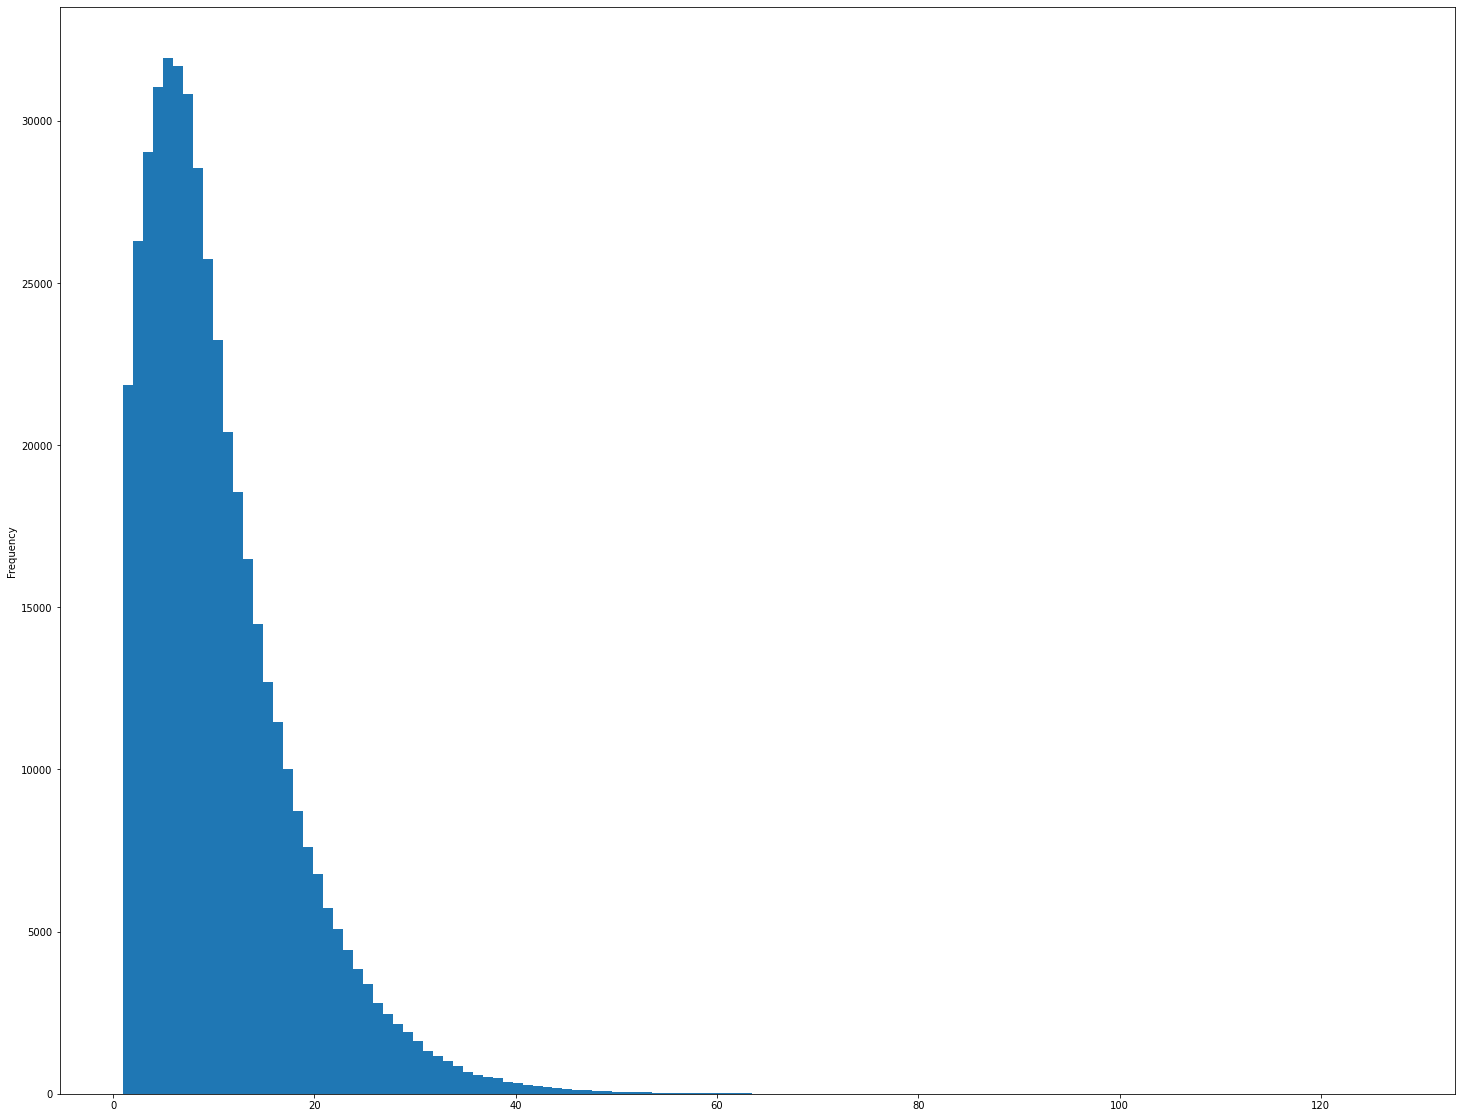

In [44]:
products_mean = df_orprod.groupby(['order_id'])['product_id'].count().sort_values(
    # agrupacion para saber cuantos productos hay en cada pedido
    ascending=False).reset_index()
products_mean.columns = ['order_id', 'item_no_total']
products_mean['item_no_total'].plot(kind='hist', bins=127, figsize=(25, 20))
plt.show
print(products_mean.head())
print('El promedio de productos comprados es de:',
      products_mean['item_no_total'].mean())
print('El minimo de productos comprados es de:',
      products_mean['item_no_total'].min())
print('El maximo de productos comprados es de:',
      products_mean['item_no_total'].max())

Escribe aquí tus conclusiones

El promedio de articulos comprados por las personas es de 10 y por lo que se ve, su distribucion es irregular pues hay un min de 1 articulo comprado a un maximo de 127.
En el histograma se puede apreciar como es que la mayor parte de las personas se van por 10 productos promedio y de ahi en delante va bajando.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [45]:
# Se vuelve a tomar la grafica cuyos nombres se habian combinado con anterioridad
reordered_prod = merged_product_id[merged_product_id['reordered'] == 1]

In [46]:
reordered_pop = reordered_prod['product_name'].value_counts(
).sort_values(ascending=False).reset_index()
print(reordered_pop.head(20))
reordered_pop.info()

                       index  product_name
0                     BANANA         55763
1     BAG OF ORGANIC BANANAS         44450
2       ORGANIC STRAWBERRIES         28639
3       ORGANIC BABY SPINACH         26233
4       ORGANIC HASS AVOCADO         23629
5            ORGANIC AVOCADO         18743
6         ORGANIC WHOLE MILK         16251
7                LARGE LEMON         15044
8        ORGANIC RASPBERRIES         14748
9               STRAWBERRIES         13945
10                     LIMES         13327
11      ORGANIC YELLOW ONION         11145
12            ORGANIC GARLIC         10411
13          ORGANIC ZUCCHINI         10076
14            CUCUMBER KIRBY          9538
15        ORGANIC FUJI APPLE          8989
16  APPLE HONEYCRISP ORGANIC          8836
17       ORGANIC BLUEBERRIES          8799
18             ORGANIC LEMON          8412
19       ORGANIC HALF & HALF          8389
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35651 entries, 0 to 35650
Data columns (total 2

Escribe aquí tus conclusiones

Los primeros productos que vuelven a pedirse con mas frecuencia son muy parecidos a aquellos que son mas populares, mostrados anteriormente.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [47]:
# cambio de nombre de columnas para poder combinar y hacerlas entendibles
reordered_pop.columns = ['product_name', 'reordered_no']
df_orprod_pop.columns = ['product_name', 'ordered_no']

In [48]:
merged_orders = df_orprod_pop.merge(
    reordered_pop, on='product_name', how='left')
print(merged_orders.head())

             product_name  ordered_no  reordered_no
0                  BANANA       66050       55763.0
1  BAG OF ORGANIC BANANAS       53297       44450.0
2    ORGANIC STRAWBERRIES       37039       28639.0
3    ORGANIC BABY SPINACH       33971       26233.0
4    ORGANIC HASS AVOCADO       29773       23629.0


In [49]:
def tasa_rep(row):
    return row['reordered_no']/row['ordered_no']


merged_orders['ratio'] = merged_orders.apply(tasa_rep, axis=1)
print(merged_orders.head(20))
print()
print(merged_orders['ratio'].mean())

                product_name  ordered_no  reordered_no     ratio
0                     BANANA       66050       55763.0  0.844254
1     BAG OF ORGANIC BANANAS       53297       44450.0  0.834006
2       ORGANIC STRAWBERRIES       37039       28639.0  0.773212
3       ORGANIC BABY SPINACH       33971       26233.0  0.772217
4       ORGANIC HASS AVOCADO       29773       23629.0  0.793639
5            ORGANIC AVOCADO       24689       18743.0  0.759164
6                LARGE LEMON       21495       15044.0  0.699884
7               STRAWBERRIES       20018       13945.0  0.696623
8                      LIMES       19690       13327.0  0.676841
9         ORGANIC WHOLE MILK       19600       16251.0  0.829133
10       ORGANIC RASPBERRIES       19197       14748.0  0.768245
11      ORGANIC YELLOW ONION       15898       11145.0  0.701032
12            ORGANIC GARLIC       15292       10411.0  0.680813
13          ORGANIC ZUCCHINI       14584       10076.0  0.690894
14       ORGANIC BLUEBERR

Escribe aquí tus conclusiones

Las tasas de repeticion de compra tienen una media cerca del 0.5

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [50]:
# para limpiar información solo se seleccionan las dos columnas necesarias para la combinación
order_user_id = df_orders[['user_id', 'order_id']].copy()

# combinacion de dataframes para obtener el no de productos totales por pedido.
merged_clients = order_user_id.merge(products_mean, on='order_id', how='left')

# se toma la grafica anterior filtrada con clientes que volvieron a comprar articulos.
reordered_ord = reordered_prod.groupby(
    ['order_id'])['product_id'].count().sort_values(ascending=False).reset_index()
reordered_ord.columns = ['order_id', 'total_items_reordered']

# Combinación de las graficas para poder obtener la tasa de reorden.
merged_clients = merged_clients.merge(reordered_ord, on='order_id', how='left')
# Se muestra la grafica final para poder seguir con el calculo de la tasa de reorden.
print(merged_clients.head())

   user_id  order_id  item_no_total  total_items_reordered
0   183418   1515936           13.0                    7.0
1   163593   1690866            6.0                    3.0
2    39980   1454967            6.0                    NaN
3    82516   1768857           16.0                   11.0
4   196724   3007858           27.0                   11.0


In [51]:
def tasa_cliente(row):
    return row['total_items_reordered']/row['item_no_total']


merged_clients['ratio'] = merged_clients.apply(tasa_cliente, axis=1)
merged_clients = merged_clients.dropna()
print(merged_clients.head(20))
print()
print(merged_clients['ratio'].mean())

    user_id  order_id  item_no_total  total_items_reordered     ratio
0    183418   1515936           13.0                    7.0  0.538462
1    163593   1690866            6.0                    3.0  0.500000
3     82516   1768857           16.0                   11.0  0.687500
4    196724   3007858           27.0                   11.0  0.407407
5     20084   1843871           16.0                    7.0  0.437500
6    148233   2511640            6.0                    5.0  0.833333
7     97711   2521283           10.0                    6.0  0.600000
8     34954   2266494            3.0                    3.0  1.000000
9     15356    446014            3.0                    1.0  0.333333
11   191558    102585            7.0                    2.0  0.285714
13    36310    782916           20.0                   14.0  0.700000
14    74699   2843219           12.0                    1.0  0.083333
16    55090   3109465            3.0                    2.0  0.666667
17   146663    72751

Escribe aquí tus conclusiones

la tasa de reorden es muy buena, con una media de 0.68 lo que significa que mas de la mitad de los productos que compran los clientes son productos que anteriormente fueron adquiridos por éstos. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [52]:
# Filtro para guardar los articulos que se guardaron primero en el carrito
cart_pop = merged_product_id[merged_product_id['add_to_cart_order'] == 1]

cart_pop = cart_pop['product_name'].value_counts().sort_values(ascending=False)
print(cart_pop.head(20))

BANANA                         15562
BAG OF ORGANIC BANANAS         11026
ORGANIC WHOLE MILK              4363
ORGANIC STRAWBERRIES            3946
ORGANIC HASS AVOCADO            3390
ORGANIC BABY SPINACH            3336
ORGANIC AVOCADO                 3044
SPRING WATER                    2336
STRAWBERRIES                    2308
ORGANIC RASPBERRIES             2024
SPARKLING WATER GRAPEFRUIT      1914
ORGANIC HALF & HALF             1797
LARGE LEMON                     1737
SODA                            1733
ORGANIC REDUCED FAT MILK        1397
LIMES                           1370
HASS AVOCADOS                   1340
ORGANIC REDUCED FAT 2% MILK     1310
HALF & HALF                     1309
ORGANIC YELLOW ONION            1246
Name: product_name, dtype: int64


Escribe aquí tus conclusiones

Algunos de los articulos coinciden con las anteriores clasificaciones de 20 productos tambien y en todos las bananas estan en primer lugar. 

### Conclusion general del proyecto:

Es muy interesante lo que se puede obtener con unas cuantas listas, la informacion grafica contiene patrones que revisando datos de uno por uno no se podrían obtener. con la información obtenida podemos ver los patrones en los que la mayoria de usuarios caen, como el reorden de un artículo, los dias que pasan para volver a comprar etc.. y en base a ello se podrían establecer estrategias de venta para incrementar los estadísticos obtenidos.